In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.sparse import csr_matrix

In [2]:
movies = pd.read_csv(r'C:\Users\hp\Desktop\disha\ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
links = pd.read_csv(r'C:\Users\hp\Desktop\disha\ml-latest-small/links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [4]:
ratings = pd.read_csv(r'C:\Users\hp\Desktop\disha\ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
tags = pd.read_csv(r'C:\Users\hp\Desktop\disha\ml-latest-small/tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
print(len(movies))
print(len(ratings))

9742
100836


In [7]:
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:        
        genre_movies = movies[movies['genres'].str.contains(genre) ]
        avg_genre_votes_per_user = ratings[ratings['movieId'].isin(genre_movies['movieId'])].loc[:, ['userId', 'rating']].groupby(['userId'])['rating'].mean().round(2)
        
        genre_ratings = pd.concat([genre_ratings, avg_genre_votes_per_user], axis=1)
        
    genre_ratings.columns = column_names
    return genre_ratings

In [8]:
genre_ratings = get_genre_ratings(ratings, movies, ['Drama', 'Romance'], ['avg_drama_rating', 'avg_romance_rating'])
genre_ratings.head()

,avg_drama_rating,avg_romance_rating
userId,,
1,4.53,4.31
2,3.88,4.50
3,0.75,0.50
4,3.48,3.38
5,3.80,3.09


In [12]:
def bias_genre_rating(genre_ratings, score_limit_1, score_limit_2):
    biased = genre_ratings[((genre_ratings['avg_drama_rating'] < score_limit_1 - 0.2) & (genre_ratings['avg_romance_rating'] > score_limit_2)) | ((genre_ratings['avg_drama_rating'] < score_limit_1) & (genre_ratings['avg_romance_rating'] > score_limit_2))]
    biased = pd.concat([biased[:300], genre_ratings[:2]])
    biased = pd.DataFrame(biased.to_records())
    return biased_ds

In [15]:
biased_ds = bias_genre_rating(genre_ratings, 3.1, 2.2)

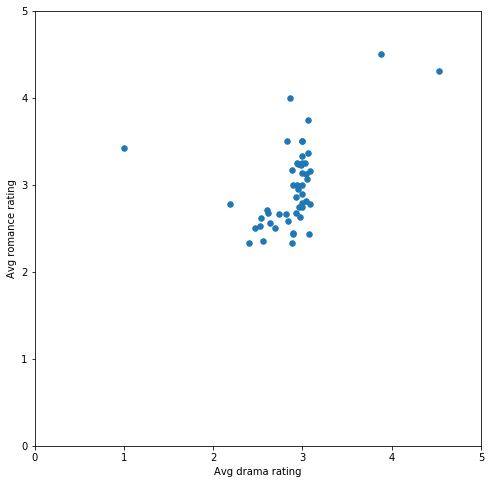

In [26]:
%matplotlib inline

fig = plt.figure(figsize=(8,8))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Avg drama rating')
plt.ylabel('Avg romance rating')
plt.scatter(biased_dataset['avg_drama_rating'], biased_dataset['avg_romance_rating'], s=30)

# K Means

In [27]:
X = biased_ds[['avg_drama_rating','avg_romance_rating']].values

In [28]:
from sklearn.cluster import KMeans 

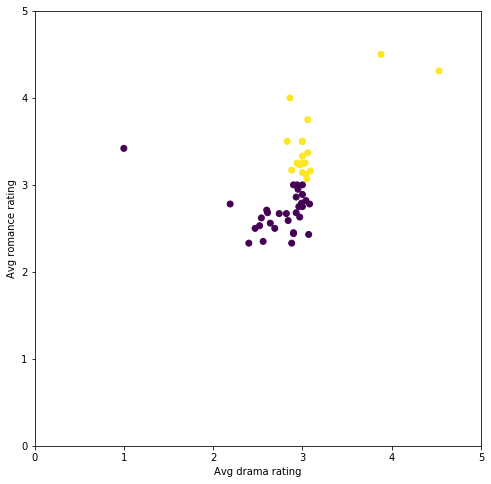

In [36]:
kmeans_1 = KMeans(n_clusters=2)
predictions = kmeans_1.fit_predict(X)

fig = plt.figure(figsize=(8,8))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Avg drama rating')
plt.ylabel('Avg romance rating')

clustered = pd.concat([biased_ds.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
plt.scatter(clustered['avg_drama_rating'], clustered['avg_romance_rating'], c=clustered['group'],cmap='viridis')

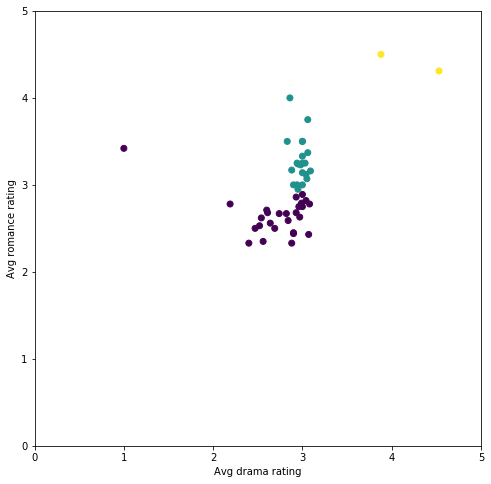

In [37]:
#Create an instance of KMeans to find three clusters
kmeans_2 = KMeans(n_clusters=3)

# Use fit_predict to cluster the dataset
predictions_2 = kmeans_2.fit_predict(X)

# Plot
fig = plt.figure(figsize=(8,8))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Avg drama rating')
plt.ylabel('Avg romance rating')

clustered = pd.concat([biased_ds.reset_index(), pd.DataFrame({'group':predictions_2})], axis=1)
plt.scatter(clustered['avg_drama_rating'], clustered['avg_romance_rating'], c=clustered['group'],cmap='viridis')

The groups are:

1. people who like romance but not drama
2. people who like drama but not romance
3. people who like both drama and romance

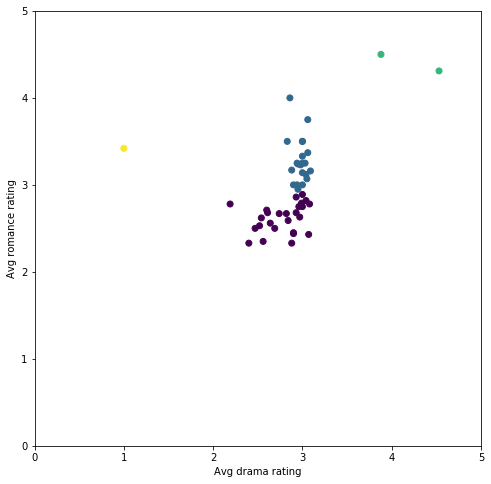

In [38]:
#Create an instance of KMeans to find three clusters
kmeans_3 = KMeans(n_clusters=4)

# Use fit_predict to cluster the dataset
predictions_3 = kmeans_3.fit_predict(X)

# Plot
fig = plt.figure(figsize=(8,8))
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('Avg drama rating')
plt.ylabel('Avg romance rating')

clustered = pd.concat([biased_ds.reset_index(), pd.DataFrame({'group':predictions_3})], axis=1)
plt.scatter(clustered['avg_drama_rating'], clustered['avg_romance_rating'], c=clustered['group'],cmap='viridis')

# elbow method to find the optimal number of clusters for k means 

The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 4 in the examples above), and for each value of k calculate the sum of squared errors (SSE).

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score

def clustering_errors(k, data):
    kmeans = KMeans(n_clusters=k).fit(data)
    predictions = kmeans.predict(data)
    silhouette_avg = silhouette_score(data, predictions)
    return silhouette_avg

silhouette clustering coefficient 
1. To study the separation distance between the resulting clusters
2. Displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1]


In [49]:
possible_k = range(2, len(X)+1, 2)

errors_per_k = [clustering_errors(k, X) for k in possible_k]

In [50]:
list(zip(possible_k, errors_per_k))

[(2, 0.4478413564792977),
 (4, 0.504612637195858),
 (6, 0.4422190739083968),
 (8, 0.40344314682553695),
 (10, 0.3887924327846598),
 (12, 0.3812264994424525),
 (14, 0.3519237763506067),
 (16, 0.3449962329335893),
 (18, 0.3666482813203005),
 (20, 0.3640535609501054),
 (22, 0.3847567503904421),
 (24, 0.37594635523106185),
 (26, 0.381901994328052),
 (28, 0.36210674904558326),
 (30, 0.3309744680921408),
 (32, 0.3079882450357358),
 (34, 0.286108898163878),
 (36, 0.2467697941085003),
 (38, 0.23736109875070427),
 (40, 0.1970439346910581),
 (42, 0.16759087690090346),
 (44, 0.15093239218816568),
 (46, 0.1106423883659557),
 (48, 0.07656715574492001),
 (50, 0.04)]

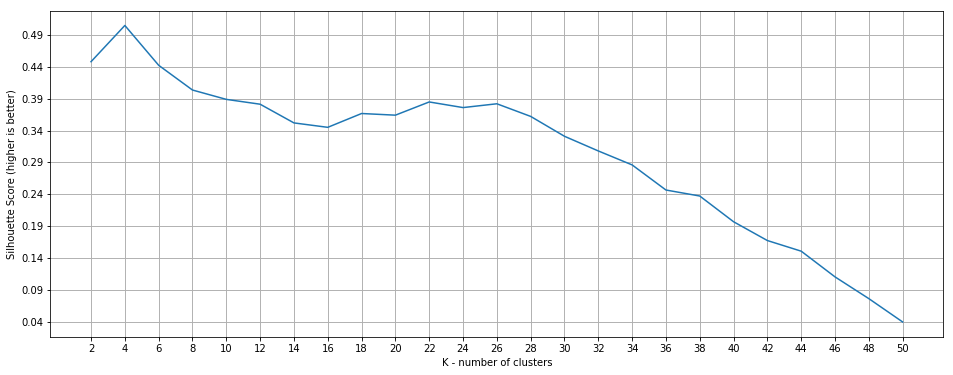

In [55]:
# Plot the each value of K vs. the silhouette score at that value
fig, ax = plt.subplots(figsize=(16, 6))
ax.set_xlabel('K - number of clusters')
ax.set_ylabel('Silhouette Score (higher is better)')
ax.plot(possible_k, errors_per_k)

# Ticks and grid
xticks = np.arange(min(possible_k), max(possible_k)+1, 2.0)
ax.set_xticks(xticks, minor=False)
ax.set_xticks(xticks, minor=True)
ax.xaxis.grid(True, which='both')
yticks = np.arange(round(min(errors_per_k), 2), max(errors_per_k), .05)
ax.set_yticks(yticks, minor=False)
ax.set_yticks(yticks, minor=True)
ax.yaxis.grid(True, which='both')

Thus, k = 4 is the optimal no of clusters

# Clustering - movies

In [57]:
# Merge the two tables then pivot so we have Users X Movies dataframe
ratings_title = pd.merge(ratings, movies[['movieId', 'title']], on='movieId' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')

print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')
user_movie_ratings.iloc[:6, :10]

dataset dimensions:  (610, 9719) 

Subset example:


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987)
userId,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


nan : shows most users have not rated the movies

In [65]:
def get_most_rated_movies(user_movie_ratings, max_number_of_movies):
    # 1- Count
    user_movie_ratings = user_movie_ratings.append(user_movie_ratings.count(), ignore_index=True)
    # 2- sort
    user_movie_ratings_sorted = user_movie_ratings.sort_values(len(user_movie_ratings)-1, axis=1, ascending=False)
    user_movie_ratings_sorted = user_movie_ratings_sorted.drop(user_movie_ratings_sorted.tail(1).index)
    # 3- slice
    most_rated_movies = user_movie_ratings_sorted.iloc[:, :max_number_of_movies]
    return most_rated_movies

def get_users_who_rate_the_most(most_rated_movies, max_number_of_movies):
    # Get most voting users
    # 1- Count
    most_rated_movies['counts'] = pd.Series(most_rated_movies.count(axis=1))
    # 2- Sort
    most_rated_movies_users = most_rated_movies.sort_values('counts', ascending=False)
    # 3- Slice
    most_rated_movies_users_selection = most_rated_movies_users.iloc[:max_number_of_movies, :]
    most_rated_movies_users_selection = most_rated_movies_users_selection.drop(['counts'], axis=1)
    
    return most_rated_movies_users_selection

def sort_by_rating_density(user_movie_ratings, n_movies, n_users):
    most_rated_movies = get_most_rated_movies(user_movie_ratings, n_movies)
    most_rated_movies = get_users_who_rate_the_most(most_rated_movies, n_users)
    return most_rated_movies

In [68]:
n_movies = 30
n_users = 18
most_rated_movies_users_selection = sort_by_rating_density(user_movie_ratings, n_movies, n_users)

most_rated_movies_users_selection.head()

title,Forrest Gump (1994),"Shawshank Redemption, The (1994)",Pulp Fiction (1994),"Silence of the Lambs, The (1991)","Matrix, The (1999)",Star Wars: Episode IV - A New Hope (1977),Jurassic Park (1993),Braveheart (1995),Terminator 2: Judgment Day (1991),Schindler's List (1993),...,Star Wars: Episode VI - Return of the Jedi (1983),"Godfather, The (1972)","Fugitive, The (1993)",Batman (1989),Saving Private Ryan (1998),"Lord of the Rings: The Two Towers, The (2002)","Lord of the Rings: The Return of the King, The (2003)",Aladdin (1992),Fargo (1996),"Sixth Sense, The (1999)"
611,330.0,318.0,308.0,280.0,279.0,252.0,239.0,238.0,225.0,221.0,...,197.0,193.0,191.0,190.0,189.0,189.0,186.0,184.0,182.0,180.0
67,3.5,3.0,2.0,3.5,4.5,5.0,3.5,2.5,3.5,4.0,...,5.0,4.0,4.5,4.0,4.0,4.0,4.5,3.5,2.5,2.5
610,329.0,317.0,307.0,279.0,278.0,251.0,238.0,237.0,224.0,220.0,...,196.0,192.0,190.0,189.0,188.0,188.0,185.0,183.0,181.0,179.0
589,5.0,4.5,4.5,3.5,4.0,5.0,4.0,4.0,4.5,5.0,...,4.5,5.0,4.0,3.5,4.0,5.0,4.5,4.0,4.0,3.5
479,5.0,5.0,4.0,4.5,5.0,4.5,5.0,5.0,4.5,5.0,...,3.5,5.0,3.5,4.5,4.5,4.5,4.0,4.0,4.0,4.0


In [70]:
user_movie_ratings =  pd.pivot_table(ratings_title, index='userId', columns= 'title', values='rating')
most_rated_movies_1k = get_most_rated_movies(user_movie_ratings, 1000)

In [71]:
sparse_ratings = csr_matrix(pd.SparseDataFrame(most_rated_movies_1k).to_coo())

In [72]:
pred = KMeans(n_clusters=20, algorithm='full').fit_predict(sparse_ratings)

In [77]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def movie_clusters(clustered, max_users, max_movies):
    c=1
    for cluster_id in clustered.group.unique():
        # To improve visibility, we're showing at most max_users users and max_movies movies per cluster.
        # You can change these values to see more users & movies per cluster
        d = clustered[clustered.group == cluster_id].drop(['index', 'group'], axis=1)
        n_users_in_cluster = d.shape[0]
        
        d = sort_by_rating_density(d, max_movies, max_users)
        
        d = d.reindex_axis(d.mean().sort_values(ascending=False).index, axis=1)
        d = d.reindex_axis(d.count(axis=1).sort_values(ascending=False).index)
        d = d.iloc[:max_users, :max_movies]
        n_users_in_plot = d.shape[0]
        
        # We're only selecting to show clusters that have more than 9 users, otherwise, they're less interesting
        if len(d) > 9:
            print('cluster # {}'.format(cluster_id))
            print('# of users in cluster: {}.'.format(n_users_in_cluster), '# of users in plot: {}'.format(n_users_in_plot))
            fig = plt.figure(figsize=(15,4))
            ax = plt.gca()

            ax.invert_yaxis()
            ax.xaxis.tick_top()
            labels = d.columns.str[:40]

            ax.set_yticks(np.arange(d.shape[0]) , minor=False)
            ax.set_xticks(np.arange(d.shape[1]) , minor=False)

            ax.set_xticklabels(labels, minor=False)
                        
            ax.get_yaxis().set_visible(False)

            # Heatmap
            heatmap = plt.imshow(d, vmin=0, vmax=5, aspect='auto')

            ax.set_xlabel('movies')
            ax.set_ylabel('User id')

            divider = make_axes_locatable(ax)
            cax = divider.append_axes("right", size="5%", pad=0.05)

            # Color bar
            cbar = fig.colorbar(heatmap, ticks=[5, 4, 3, 2, 1, 0], cax=cax)
            cbar.ax.set_yticklabels(['5 stars', '4 stars','3 stars','2 stars','1 stars','0 stars'])

            plt.setp(ax.get_xticklabels(), rotation=90, fontsize=9)
            plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', labelbottom='off', labelleft='off') 
            #print('cluster # {} \n(Showing at most {} users and {} movies)'.format(cluster_id, max_users, max_movies))

            plt.show()

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  del sys.path[0]
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  
C:\Users\Hp\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


cluster # 0.0
# of users in cluster: 31. # of users in plot: 31


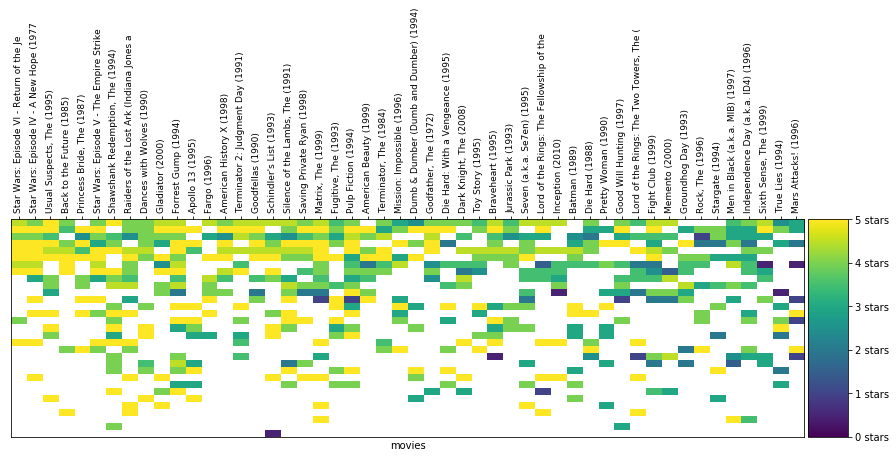

cluster # 1.0
# of users in cluster: 19. # of users in plot: 19


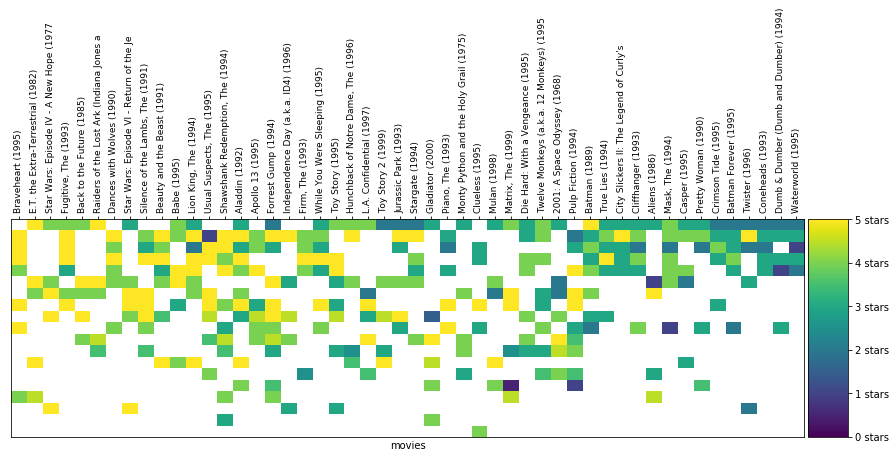

In [78]:
max_users = 70
max_movies = 50

clustered = pd.concat([most_rated_movies_1k.reset_index(), pd.DataFrame({'group':predictions})], axis=1)
movie_clusters(clustered, max_users, max_movies)

The color of the cell is how the user rated that movie based on the scale on the right of the graph.

1. white cells indicates that the user did not review
2. The more similar the ratings in a cluster are, the more vertical lines in similar colors you'll be able to trace in that cluster.
3. the horizontal lines with similar colors indicate these are users without a lot of variety in their ratings.
4. Some clusters are mostly yellow and bring together people who really love a certain group of movies. 
5. green or blue clusters mean they contain people who agree that a certain set of movies deserves 2-3 stars.

In [87]:
# TODO: Pick a cluster ID from the clusters above
cluster_number = 1

# Let's filter to only see the region of the dataset with the most number of values 
n_users = 75
n_movies = 300
cluster = clustered[clustered.group == cluster_number].drop(['index', 'group'], axis=1)

cluster = sort_by_rating_density(cluster, n_movies, n_users)

In [88]:
cluster.fillna('').head()

,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)",Aladdin (1992),"Silence of the Lambs, The (1991)","Lion King, The (1994)",Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Toy Story (1995),"Usual Suspects, The (1995)",Batman (1989),...,Frequency (2000),Sister Act (1992),Planet of the Apes (2001),"Fisher King, The (1991)",Chicago (2002),Skyfall (2012),Mad Max: Fury Road (2015),In & Out (1997),Big Daddy (1999),Dark City (1998)
6,2,,,3,,3,4,4,,5,...,3,3,,4,,,,2,2,3
1,5,2,5,5,4,5,4,,1,3,...,,,,,,,,,,
7,,,,5,,5,,,,,...,3,,3,,5,,,,,
18,3,4,3.5,,3.5,,3,3,,,...,,,,,,2.5,3,,,
2,5,,,3,5,,,4.5,4.5,3,...,,,1,,4.5,,,,,


In [89]:
# TODO: Fill in the name of the column/movie. e.g. 'Forrest Gump (1994)'
# Pick a movie from the table above since we're looking at a subset
movie_name = "Dark Knight, The (2008)"

cluster[movie_name].mean()

4.0

In [90]:
cluster.mean().head(20)

Forrest Gump (1994)                          4.000000
Pulp Fiction (1994)                          3.500000
Shawshank Redemption, The (1994)             4.100000
Aladdin (1992)                               4.100000
Silence of the Lambs, The (1991)             4.312500
Lion King, The (1994)                        4.125000
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    3.562500
Toy Story (1995)                             3.812500
Usual Suspects, The (1995)                   4.125000
Batman (1989)                                3.500000
Apollo 13 (1995)                             4.071429
2001: A Space Odyssey (1968)                 3.500000
While You Were Sleeping (1995)               3.857143
Beauty and the Beast (1991)                  4.214286
Mask, The (1994)                             3.285714
Fugitive, The (1993)                         4.428571
Die Hard: With a Vengeance (1995)            3.571429
Braveheart (1995)                            4.714286
Batman Forever (1995)       

In [91]:
user_id = 5

# Get all this user's ratings
user_2_ratings  = cluster.loc[user_id, :]

# Which movies did they not rate? (We don't want to recommend movies they've already rated)
user_2_unrated_movies =  user_2_ratings[user_2_ratings.isnull()]

# What are the ratings of these movies the user did not rate?
avg_ratings = pd.concat([user_2_unrated_movies, cluster.mean()], axis=1, join='inner').loc[:,0]

# Let's sort by rating so the highest rated movies are presented first
avg_ratings.sort_values(ascending=False)[:20]

Muppet Movie, The (1979)                                5.000000
Princess Bride, The (1987)                              5.000000
Saving Private Ryan (1998)                              4.833333
Chicago (2002)                                          4.750000
E.T. the Extra-Terrestrial (1982)                       4.700000
Psycho (1960)                                           4.666667
Dead Man Walking (1995)                                 4.666667
Emma (1996)                                             4.666667
Who Framed Roger Rabbit? (1988)                         4.666667
Star Wars: Episode IV - A New Hope (1977)               4.600000
Billy Elliot (2000)                                     4.500000
Despicable Me (2010)                                    4.500000
Spirited Away (Sen to Chihiro no kamikakushi) (2001)    4.500000
Congo (1995)                                            4.500000
Goonies, The (1985)                                     4.500000
South Park: Bigger, Longe